# CALLER AND MUTATIONS COMPARISON

In [1]:
# Needed basic packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Importing filtered mutation tables

In [2]:
import pandas as pd

# Import filtered mutation files from Mutect, Strelka and Sage callers from the three samples (melanoma, sarcoma, lung)
mel_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Mutect2_VAF.tsv.gz', sep="\t", header=0)
mel_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Strelka_VAF_all.tsv.gz', sep="\t", header=0)
sar_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_Mutect2_VAF.tsv.gz', sep="\t", header=0)
sar_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_Strelka_VAF_all.tsv.gz', sep="\t", header=0)
lung_m_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_Mutect2_VAF.tsv.gz', sep="\t", header=0)
lung_s_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_Strelka_VAF_all.tsv.gz', sep="\t", header=0)

mel_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_SAGE_VAF.tsv.gz', sep="\t", header=0)
sar_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_SAGE_VAF.tsv.gz', sep="\t", header=0)
lung_sage_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_SAGE_VAF.tsv.gz', sep="\t", header=0)

In [31]:
# Check dimensions of the dataframes so the number of rows is correct
mel_m_df.shape+ mel_s_df.shape + mel_sage_df.shape

(1079488, 22, 1279052, 20, 1013333, 22)

In [32]:
sar_m_df.shape + sar_s_df.shape + sar_sage_df.shape

(25860, 22, 26140, 20, 21809, 22)

In [5]:
lung_m_df.shape + lung_s_df.shape + lung_sage_df.shape

(23011, 13, 24072, 10, 20454, 13)

In [33]:
mel_sage_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_AF,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,mut_type,SAMPLE
0,chr1,59074,.,C,T,254,PASS,RC=ATTTTTTG;RC_IDX=4;RC_LF=TTCATCAAGT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:69,0:0:69:2230,0:74,0:0,0,0,0,0,69,69:0:...",...,0.0,55,69,39,69,16,0,0.291,SNV,melanoma
1,chr1,108632,.,C,T,282,PASS,RC=ATTCCCCA;RC_IDX=2;RC_LF=AGGTGAACAT;RC_NM=1;...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:176,0:0:176:5404,0:178,0:0,0,0,0,0,176,1...",...,0.0,178,176,154,176,24,0,0.135,SNV,melanoma
2,chr1,115638,.,G,A,251,PASS,LPS=4;LPS_RC=22;RC=CAAGT;RC_IDX=2;RC_LF=AAAGTG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:155,0:0:155:4877,0:159,0:0,0,0,0,0,155,1...",...,0.0,157,155,134,155,22,0,0.140,SNV,melanoma
3,chr1,135156,.,G,A,307,PASS,RC=GAAAG;RC_IDX=2;RC_LF=GCTGGGCGTG;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:246,0:0:246:7687,0:250,0:0,0,0,0,0,246,2...",...,0.0,232,246,213,246,19,0,0.082,SNV,melanoma
4,chr1,182978,.,GG,AA,451,PASS,LPS=5;LPS_RC=27;RC=GTAAGA;RC_IDX=2;RC_LF=ATTGG...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:182,0:0:182:5653,0:184,0:0,0,0,0,0,182,1...",...,0.0,207,182,180,182,27,0,0.130,MNV,melanoma


## a) Represent the number of mutations with each caller

In [34]:
## Extract the number of mutations with the three callers

#For saranoma sample
mel_mutect = len(mel_m_df['FILTER'])
mel_strelka = len(mel_s_df['FILTER'])
mel_sage = len(mel_sage_df['FILTER'])
mut_mel = (mel_mutect, mel_strelka, mel_sage)

# For sarcoma sample
sar_mutect = len(sar_m_df['FILTER'])
sar_strelka = len(sar_s_df['FILTER'])
sar_sage = len(sar_sage_df['FILTER'])
mut_sar = (sar_mutect, sar_strelka, sar_sage)

# For lung sample
lung_mutect = len(lung_m_df['FILTER'])
lung_strelka = len(lung_s_df['FILTER'])
lung_sage = len(lung_sage_df['FILTER'])
mut_lung = (lung_mutect, lung_strelka, lung_sage)

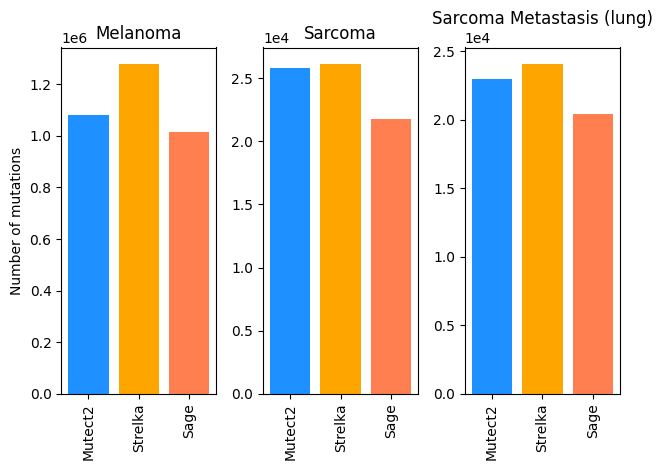

In [35]:
# Representation in three bar plot graphs
import numpy as np
import matplotlib.pyplot as plt

callers = ['Mutect2', 'Strelka', 'Sage']
x_pos = np.arange(len(callers))
cols = ['dodgerblue' if (x == 'Mutect2') else 'orange' if (x == 'Strelka') else 'coral' for x in callers]

plt.subplot(1, 3, 1)  # row 1, col 3 index 1
plt.bar(x_pos, mut_mel, align='center', color=cols)
plt.title('Melanoma')
plt.xticks(x_pos, callers, rotation=90)
plt.ylabel('Number of mutations')

plt.subplot(1, 3, 2)  # row 1, col 3 index 2
plt.bar(x_pos, mut_sar, align='center', color=cols)
plt.xticks(x_pos, callers, rotation=90)
plt.title('Sarcoma')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.subplot(1, 3, 3)  # row 1, col 3 index 3
plt.bar(x_pos, mut_lung, align='center', color=cols)
plt.xticks(x_pos, callers, rotation=90)
plt.title('Sarcoma Metastasis (lung)')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.tight_layout()
plt.show()


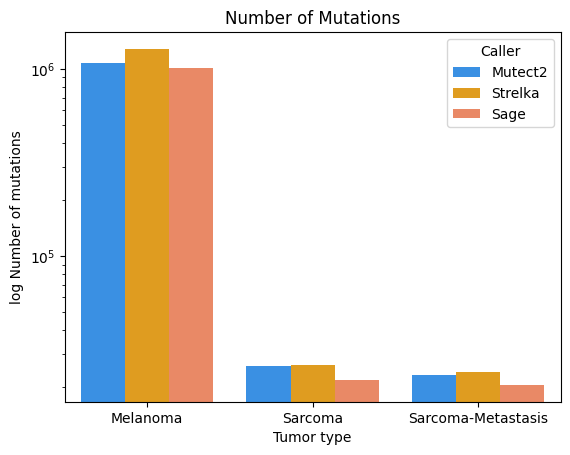

In [36]:
# Representation in one single bar plot graph
# Make a dataframe to represent data
mut_df = ({
    'Tumor type':['Melanoma', 'Melanoma', 'Melanoma', 'Sarcoma', 'Sarcoma','Sarcoma', 'Sarcoma-Metastasis', 'Sarcoma-Metastasis', 'Sarcoma-Metastasis'],
    'Number of mutations': [mel_mutect, mel_strelka, mel_sage, sar_mutect, sar_strelka, sar_sage, lung_mutect, lung_strelka, lung_sage],
    'Caller': ['Mutect2', 'Strelka', 'Sage','Mutect2', 'Strelka','Sage', 'Mutect2', 'Strelka', 'Sage']
})

mut_df = pd.DataFrame(mut_df)
ax = sns.barplot(x='Tumor type', y='Number of mutations', hue='Caller', data=mut_df, palette=['dodgerblue', 'orange','coral'])

# Set the scale to log for better visualization
ax.set_yscale('log')

# Set labels and title
ax.set(xlabel='Tumor type', ylabel='log Number of mutations', title='Number of Mutations')
# Show the plot
plt.show()

plt.savefig('/workspace/projects/sjd_melos/exports_images/density_vaf_melanoma.png',dpi=300,transparent=True, format='png', bbox_inches='tight')

### CHANGE GRAPH LANGUAGE FOR THE MASTER PROJECT

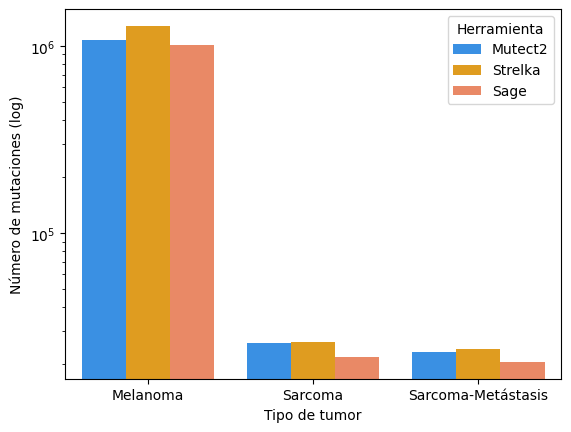

In [48]:
# Make a dataframe to represent data
mut_df2 = {
    'Tipo de tumor': ['Melanoma', 'Melanoma', 'Melanoma', 'Sarcoma', 'Sarcoma', 'Sarcoma', 'Sarcoma-Metástasis', 'Sarcoma-Metástasis', 'Sarcoma-Metástasis'],
    'Log Número de mutaciones': [mel_mutect, mel_strelka, mel_sage, sar_mutect, sar_strelka, sar_sage, lung_mutect, lung_strelka, lung_sage],
    'Herramienta': ['Mutect2', 'Strelka', 'Sage', 'Mutect2', 'Strelka', 'Sage', 'Mutect2', 'Strelka', 'Sage']
}

mut_df2 = pd.DataFrame(mut_df2)
ax2 = sns.barplot(x='Tipo de tumor', y='Log Número de mutaciones', hue='Herramienta', data=mut_df2, palette=['dodgerblue', 'orange', 'coral'])

# Set the scale to log for better visualization
ax2.set_yscale('log')

# Set labels and title
ax2.set(xlabel='Tipo de tumor', ylabel='Número de mutaciones (log)')
# Show the plot
plt.show()

## b) Caller comparison considering SNPs and INDEL mutations in consensus mutation list

In [20]:
# Filter rows with SNV-MNV from INDEL mutations in melanoma sample
mel_snvmnv_df = mel_mut_df.loc[(mel_mut_df['mut_type'] == 'SNV') | (mel_mut_df['mut_type'] == 'MNV')] 
mel_indels_df = mel_mut_df.loc[mel_mut_df['mut_type'] == 'INDEL']

In [14]:
# Filter rows with SNV-MNV from INDEL mutations in sarcoma sample
sar_snvmnv_df = sar_mut_df.loc[(sar_mut_df['mut_type'] == 'SNV') | (sar_mut_df['mut_type'] == 'MNV')] 
sar_indels_df = sar_mut_df.loc[sar_mut_df['mut_type'] == 'INDEL']

In [17]:
# Filter rows with SNV-MNV from INDEL mutations in sarcoma(lung) sample
lung_snvmnv_df = lung_mut_df.loc[(lung_mut_df['mut_type'] == 'SNV') | (lung_mut_df['mut_type'] == 'MNV')] 
lung_indels_df = lung_mut_df.loc[lung_mut_df['mut_type'] == 'INDEL']

In [18]:
sar_indels_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut
17,chr1,4069973,.,T,TA,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=67,63|31,33;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:97,1:0.010:98:44,1:41,0:95,1:51,46,1,0",...,98,63,1,33,97,0.656250,INDEL,Mutect_Strelka,sarcoma,chr1_4069973_T_TA
21,chr1,4231919,.,CA,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=129,124|3,3;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:128,0:7.337e-03:128:57,0:57,0:126,0:61,67,0,0",...,128,6,0,125,128,0.045802,INDEL,Mutect_Strelka,sarcoma,chr1_4231919_CA_C
29,chr1,4608758,.,CA,C,572,PASS,MH=A;RC=TTCAAAAAAAAAAAAAAAAAAGA;RC_IDX=2;RC_LF...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:95,0:0:96:3126,0:117,0:0,0,0,0,0,95,96:0...",...,96,44,0,28,95,0.579000,INDEL,Mutect_SAGE,sarcoma,chr1_4608758_CA_C
34,chr1,4788541,.,T,TG,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=84,101|28,39;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:132,0:7.211e-03:132:54,0:68,0:132,0:61,71,0,0",...,132,67,0,53,132,0.558333,INDEL,Mutect_Strelka,sarcoma,chr1_4788541_T_TG
101,chr1,20130828,.,CT,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=88,75|38,30;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:118,1:0.015:119:50,1:45,0:118,1:64,54,1,0",...,119,67,1,45,118,0.598214,INDEL,Mutect_Strelka,sarcoma,chr1_20130828_CT_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24230,chrY,11712779,.,AG,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=38,44|15,15;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:62,0:0.015:62:31,0:20,0:62,0:30,32,0,0",...,62,30,0,20,62,0.600000,INDEL,Mutect_Strelka,sarcoma,chrY_11712779_AG_A
24236,chrY,12371429,.,AT,A,377,PASS,MH=T;RC=TTATTTTTAT;RC_IDX=2;RC_LF=AATATATACT;R...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:38,0:0:38:1274,0:41,0:0,0,0,0,0,38,38:0:...",...,38,21,0,15,38,0.583000,INDEL,Mutect_SAGE,sarcoma,chrY_12371429_AT_A
24240,chrY,13880669,.,AG,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=44,52|20,11;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:70,0:0.014:70:30,0:29,0:68,0:31,39,0,0",...,70,31,0,26,70,0.543860,INDEL,Mutect_Strelka,sarcoma,chrY_13880669_AG_A
24262,chrY,16426090,.,TA,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=30,33|10,12;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:47,0:0.020:47:21,0:19,0:46,0:23,24,0,0",...,47,22,0,16,47,0.578947,INDEL,Mutect_Strelka,sarcoma,chrY_16426090_TA_T


In [21]:
mel_snvmnv = len(mel_snvmnv_df)
mel_indels = len(mel_indels_df)
sar_snvmnv = len(sar_snvmnv_df)
sar_indels = len(sar_indels_df)
lung_snvmnv = len(lung_snvmnv_df)
lung_indels = len(lung_indels_df)

In [63]:
lung_indels

915

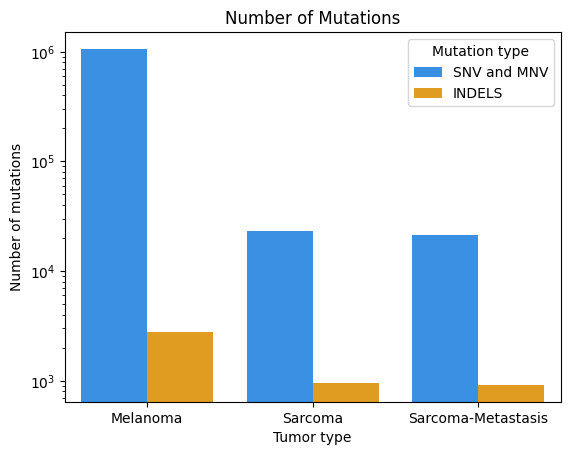

In [25]:
# Representation in one single bar plot graph
# Make a dataframe to represent data
mut_type_df = ({
    'Tumor type':['Melanoma', 'Melanoma', 'Sarcoma', 'Sarcoma', 'Sarcoma-Metastasis', 'Sarcoma-Metastasis'],
    'Number of mutations': [mel_snvmnv, mel_indels, sar_snvmnv, sar_indels, lung_snvmnv, lung_indels],
    'Mutation type': ['SNV and MNV', 'INDEL','SNV and MNV', 'INDEL', 'SNV and MNV', 'INDEL']
})

mut_type_df = pd.DataFrame(mut_type_df)
ax = sns.barplot(x='Tumor type', y='Number of mutations', hue='Mutation type', data=mut_type_df, palette=['dodgerblue', 'orange'])

# Set the scale to log for better visualization
ax.set_yscale('log')

# Set labels and title
ax.set(xlabel='Tumor type', ylabel='Number of mutations', title='Number of Mutations')
# Show the plot
plt.show()

### CHANGE GRAPH LANGUAGE FOR THE MASTER PROJECT

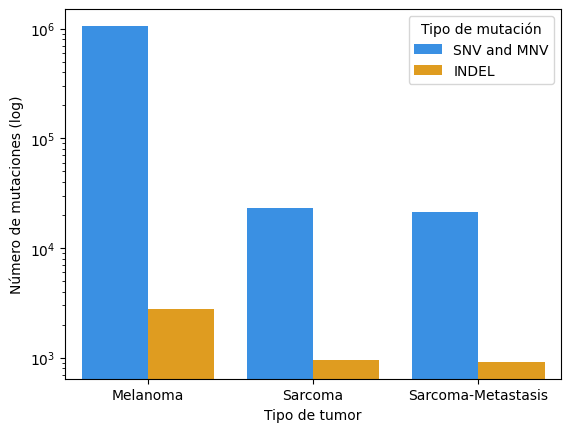

In [66]:
# Make a dataframe to represent data
mut_type_df2 = {
    'Tipo de tumor': ['Melanoma', 'Melanoma', 'Sarcoma', 'Sarcoma', 'Sarcoma-Metastasis', 'Sarcoma-Metastasis'],
    'Número de mutaciones (log)': [mel_snvmnv, mel_indels, sar_snvmnv, sar_indels, lung_snvmnv, lung_indels],
    'Tipo de mutación': ['SNV and MNV', 'INDEL', 'SNV and MNV', 'INDEL', 'SNV and MNV', 'INDEL']
}

mut_type_df2 = pd.DataFrame(mut_type_df2)
ax3 = sns.barplot(x='Tipo de tumor', y='Número de mutaciones (log)', hue='Tipo de mutación', data=mut_type_df2, palette=['dodgerblue', 'orange'])

# Set the scale to log for better visualization (base 10)
ax3.set_yscale('log')

# Set labels and title
ax3.set(xlabel='Tipo de tumor', ylabel='Número de mutaciones (log)')

# Show the plot
plt.show()